Gaussian mixture models clustering on digits data

In [ ]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Load data

In [ ]:
digits = datasets.load_digits(n_class=5)
x = digits.data
y = digits.target
print (x.shape)

(901, 64)


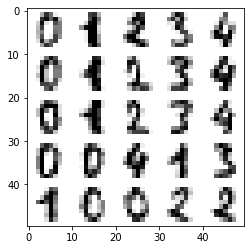

In [ ]:
nImagesperRow=5
img=np.zeros((10*nImagesperRow, 10*nImagesperRow))
for i in range(nImagesperRow):
    im = 10 * i + 1
    for j in range(nImagesperRow):
        jm = 10 * j + 1
        img[im:im+8,jm:jm+8]=x[i*nImagesperRow+j].reshape((8,8))
plt.imshow(img, cmap=plt.cm.binary) 

Plot the data points 

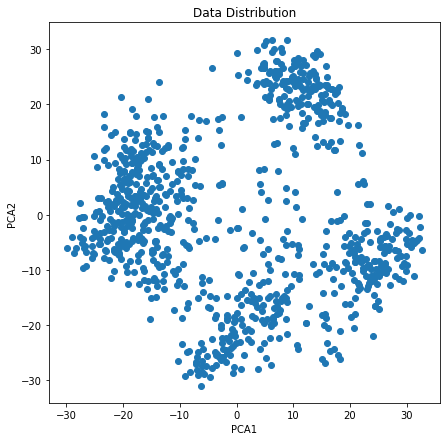

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data1["PCA1"],data1["PCA2"])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Data Distribution')
plt.show()

Dimensionality Reduction using PCA and Gaussian mixture models clustering on reduced dataset

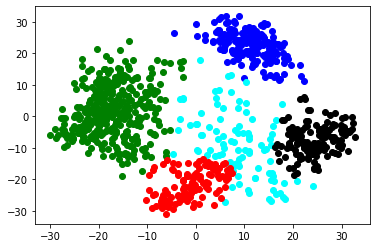

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(digits.data)
data2= pd.DataFrame(X_PCA, columns = ['PCA1','PCA2'])
gmm = GaussianMixture(n_components=5)
gmm.fit(data2)

#predictions from gmm
labels = gmm.predict(data2)
frame = pd.DataFrame(data2)
frame['cluster'] = labels
frame.columns = ['PCA1', 'PCA2', 'cluster']

color=['blue','green','cyan', 'black', 'red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PCA1"],data["PCA2"],c=color[k])
plt.show()

Gaussian clustering on streched data

In [ ]:
rng = np.random.RandomState(13)
data_stretched= pd.DataFrame(X_PCA, columns = ['PCA1','PCA2'])
X_stretched = np.dot(data_stretched, rng.randn(2, 2))
data_stretched_d= pd.DataFrame(X_stretched, columns = ['PCA1','PCA2'])

Plot the data Points

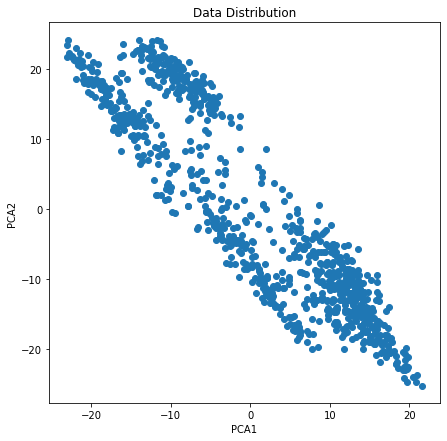

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data_stretched_d["PCA1"],data_stretched_d["PCA2"])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Data Distribution')
plt.show()

In [ ]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Gaussian Clustering

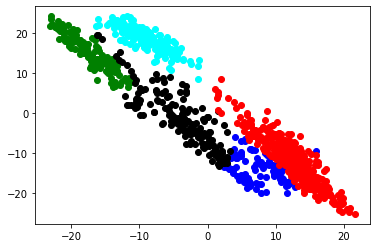

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_stretched_d)

#predictions from gmm
labels = gmm.predict(data_stretched_d)
frame = pd.DataFrame(data_stretched_d)
frame['cluster'] = labels
frame.columns = ['PCA1', 'PCA2', 'cluster']

color=['blue','green','cyan', 'black', 'red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PCA1"],data["PCA2"],c=color[k])
plt.show()

Conclusion: Gaussian can also cluster data with different shape boundaries data. 